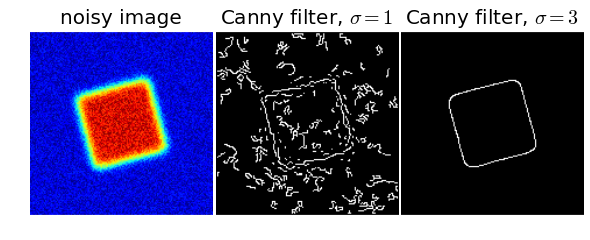

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage as ndi

from skimage import feature


# Generate noisy image of a square
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1

im = ndi.rotate(im, 15, mode='constant')
im = ndi.gaussian_filter(im, 4)
im += 0.2 * np.random.random(im.shape)

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.jet)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9,
                    bottom=0.02, left=0.02, right=0.98)

plt.show()

In [5]:
data_dir = "/Volumes/Data/All_NSLS2/scikit-beam-examples/demos/time_correlation/"

data = np.load(data_dir+"100_500_NIPA_GEL.npy")
avg_data = np.average(data, axis=0)

In [6]:
avg_data.shape

(150, 150)

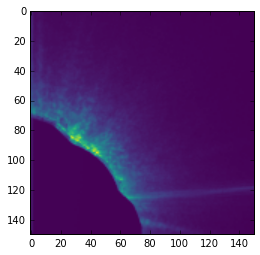

In [7]:
fig, ax = plt.subplots()
ax.imshow(avg_data, cmap='viridis')
plt.show()

In [21]:
im_edges1 = feature.canny(avg_data)
im_edges2 = feature.canny(avg_data, sigma=6)
im_edges0 = ndi.gaussian_filter(avg_data, 2)

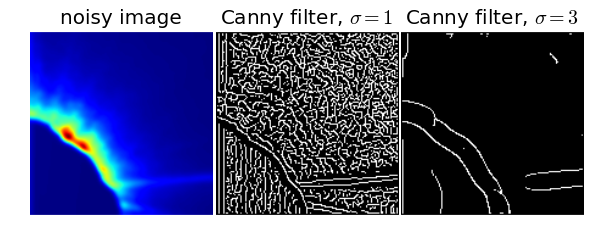

In [22]:
# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True)

ax1.imshow(im_edges0, cmap=plt.cm.jet)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(im_edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(im_edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9,
                    bottom=0.02, left=0.02, right=0.98)

plt.show()

In [25]:
edges2

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [27]:
%run download.py

__file__
current_folder = /Volumes/Data/ipython_NoteBooks/my_ipy_notebook/skimage
to --> /Volumes/Data/ipython_NoteBooks/my_ipy_notebook/skimage/Duke_data.zip
current_folder = /Volumes/Data/ipython_NoteBooks/my_ipy_notebook/skimage
extracting to --> /Volumes/Data/ipython_NoteBooks/my_ipy_notebook/skimage


In [29]:
data_dir = "Duke_data/"
duke_rdata = np.load(data_dir+"duke_img_1_5000.npy")
duke_dark = np.load(data_dir+"duke_dark.npy")

duke_data = []
for i in range(duke_rdata.shape[0]):
    duke_data.append(duke_rdata[i] - duke_dark)
    
duke_ndata=np.asarray(duke_data)

avg_duke = np.average(duke_ndata, axis=0)

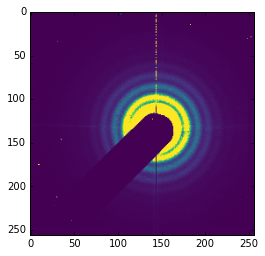

In [31]:
fig, ax = plt.subplots()
ax.imshow(avg_duke, cmap='viridis', vmin=0, vmax=1e0)
plt.show()

In [38]:
im_edges1 = feature.canny(avg_duke)
im_edges2 = feature.canny(avg_duke, sigma=3)
im_edges0 = ndi.gaussian_filter(avg_duke, 2)

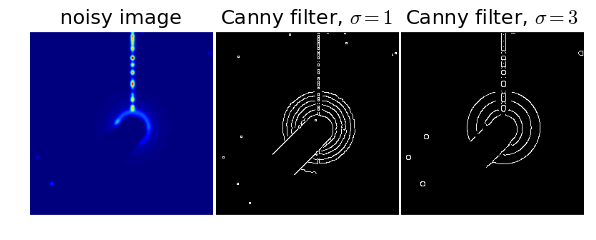

In [79]:
# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True)

ax1.imshow(im_edges0, cmap=plt.cm.jet)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(im_edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(im_edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9,
                    bottom=0.02, left=0.02, right=0.98)

plt.show()

In [42]:
avg_duke[153, 150]

0.00040000000000000002

In [44]:
np.max(avg_duke)

485.9436

In [100]:
import skbeam.core.mask as mask
y = mask.threshold_mask((avg_duke,), 0.1, mask=None)

In [101]:
u= next(y)

In [102]:
u.shape

(256, 256)

In [103]:
u

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ..., 
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

In [104]:
t = u*avg_duke

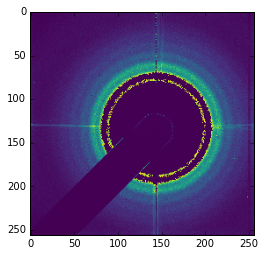

In [105]:
fig, ax = plt.subplots()
ax.imshow(t, cmap='viridis', vmin=0, vmax=0.1)
plt.show()

In [106]:
im_edges1 = feature.canny(t)
im_edges2 = feature.canny(t, sigma=3)
im_edges0 = ndi.gaussian_filter(t, 2)

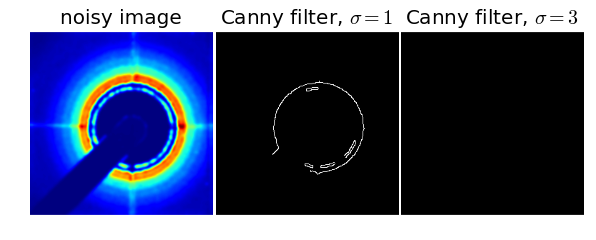

In [107]:
# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True)

ax1.imshow(im_edges0, cmap=plt.cm.jet)
ax1.axis('off')
ax1.set_title('noisy image', fontsize=20)

ax2.imshow(im_edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=20)

ax3.imshow(im_edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=20)

fig.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9,
                    bottom=0.02, left=0.02, right=0.98)

plt.show()